In [105]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

In [106]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()

In [107]:
X_train.shape


(50000, 32, 32, 3)

In [108]:
X_test.shape

(10000, 32, 32, 3)

In [109]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [110]:
y_test = y_test.reshape(-1,)

In [111]:
classes = ["Airoplane" ,"Automobile","Birds","Cat","Deer","Dog","Frog","Horse","Ship"]

In [112]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15, 2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])


In [113]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

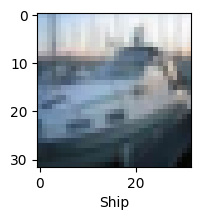

In [114]:
plot_sample(X_test, y_test, 2)

In [115]:
classes[y_classes[5]]

'Frog'

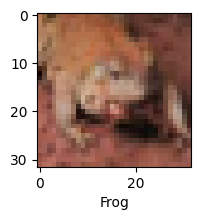

In [116]:
plot_sample(X_test, y_test, 5)

In [20]:
X_train = X_train/255.0
X_test = X_test/255.0

In [21]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation="relu"),
    layers.Dense(1000, activation="relu"),
    layers.Dense(10, activation="softmax")])

ann.compile(optimizer='SGD',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
ann.fit(X_train, y_train,epochs=5) # Changed 'epoch' to 'epochs'

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.3063 - loss: 1.9241
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4167 - loss: 1.6470
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.4527 - loss: 1.5493
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.4727 - loss: 1.4924
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4939 - loss: 1.4353


In [96]:
from sklearn.metrics import classification_report, confusion_matrix # Import the correct functions
import numpy as np  # Import numpy correctly

y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print('classification report:\n', classification_report(y_test,y_pred_classes))

# If you need the confusion matrix:
cm = confusion_matrix(y_test, y_pred_classes)
print('Confusion Matrix:\n', cm)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
classification report:
               precision    recall  f1-score   support

           0       0.57      0.42      0.49      1000
           1       0.54      0.57      0.55      1000
           2       0.58      0.07      0.12      1000
           3       0.37      0.27      0.31      1000
           4       0.46      0.31      0.37      1000
           5       0.33      0.41      0.37      1000
           6       0.66      0.27      0.39      1000
           7       0.42      0.62      0.50      1000
           8       0.36      0.85      0.50      1000
           9       0.46      0.53      0.49      1000

    accuracy                           0.43     10000
   macro avg       0.48      0.43      0.41     10000
weighted avg       0.48      0.43      0.41     10000

Confusion Matrix:
 [[424  42   7  13  19  15   7  49 370  54]
 [ 13 566   0  12   2  14   7  37 204 145]
 [105  36  70  73 153 169  37 163 155  39]
 [ 35  51   8 274  19 240  2

In [97]:
# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

# Convert y_train and y_test to one-hot encoded format
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_onehot = tf.keras.utils.to_categorical(y_test, num_classes=10) # Define y_test_onehot

# ... (rest of your CNN code) ...

cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')])

cnn.compile(optimizer='adam',
            loss='categorical_crossentropy', # Keep categorical_crossentropy
            metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=10) # Now y_train is one-hot encoded



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.2816 - loss: 3.4017
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5265 - loss: 1.3355
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6045 - loss: 1.1338
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6399 - loss: 1.0412
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6703 - loss: 0.9511
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6915 - loss: 0.8908
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7105 - loss: 0.8302
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7298 - loss: 0.7811
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7403 - loss: 0.7492
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7566 - loss: 0.7080


In [98]:
# Evaluate the model using the one-hot encoded y_test
cnn.evaluate(X_test, y_test_onehot) # Use the defined y_test_onehot
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6595 - loss: 1.0765
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[9.62789520e-04, 2.08419794e-03, 1.25866605e-03, 7.43456662e-01,
        1.71521725e-03, 1.32986143e-01, 1.16014205e-01, 3.38682992e-04,
        6.04742789e-04, 5.78779320e-04],
       [4.41991398e-03, 2.40967289e-01, 3.54988879e-05, 1.06401330e-07,
        1.21768650e-07, 1.08805320e-08, 1.35050087e-08, 1.19323440e-08,
        7.54322648e-01, 2.54429498e-04],
       [3.57112400e-02, 3.28934461e-01, 3.63122337e-02, 5.56780375e-04,
        1.03796752e-04, 9.76356023e-05, 5.43028465e-04, 5.42117225e-04,
        4.12713617e-01, 1.84485093e-01],
       [3.43163759e-01, 3.34603339e-02, 4.52397652e-02, 8.76395311e-03,
        1.16995927e-02, 6.07893453e-04, 5.66362171e-03, 7.01845041e-04,
        5.49106717e-01, 1.59252994e-03],
       [2.91855307e-03, 7.91127607e-03, 1.89494081e-02, 2.06790105e-01,
        1.01590104e-01, 1.61161609e-02, 6.37917697e-01, 3.49506503e-04,
        7.01744901e-03, 4.39780473e-04]], dtype=float32)

In [94]:
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

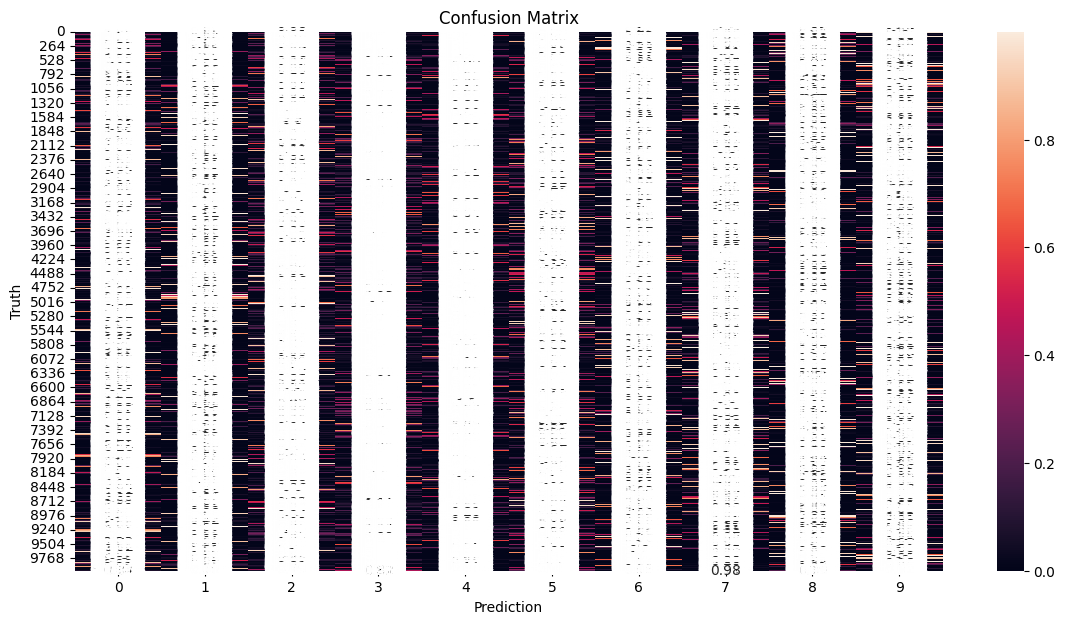

In [95]:
plt.figure(figsize = (14,7))
sns.heatmap(y_pred, annot=True)
plt.ylabel("Truth")
plt.xlabel("Prediction")
plt.title("Confusion Matrix")
plt.show

In [99]:
# The following code is the build of most basic neural network code but the neural
# network in this file has the custom layer and neurons architecture design choosing ability while running the program .
# Just provide the name of file at the place of "FILE_NAME" , file should be of .csv pattern ONLY
# and exits in the same folder as the code .
# The dataset file here can be approximately any data file having a column of "label" and
# others are feature of the data , point to be noted is that all values should we of "int" type only .
# I have tested this program on pixel based feature extraction with different dataset , its working fine .
# -------------------------------------------------------------------------------
# KINDLY REPORT FOR ANY ERRORS AND BUGS.          ---THANK YOU😊
# ------------------------------------------------------------------------------

import numpy as np
import pandas as pd

def load_dt_st():
    dt = pd.read_csv("/content/data.csv")
    y = dt['label'].values
    dt = dt.drop(columns=['label']).values
    print(f"Following dataset has : {len(dt)} examples")
    x = int(input("Enter the number of training examples you want of all : "))
    x_trn1 = dt[:x] / 255.0
    y_trn1 = y[:x]
    x_tst1 = dt[x:] / 255.0
    y_tst1 = y[x:]
    print(f"Test data examples  {len(y_tst1)} and train {len(y_trn1)} examples")
    return x_trn1, y_trn1, x_tst1, y_tst1

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)


class NeuralNetwork:
    def __init__(self, layers, learning_rate=0.01):
        self.layers = layers
        self.weights = []
        self.biases = []
        self.learning_rate = learning_rate
        for i in range(len(self.layers) - 1):
            weight = np.random.randn(self.layers[i], self.layers[i + 1]) * np.sqrt(2. / self.layers[i])
            bias = np.zeros((1, self.layers[i + 1]))
            self.weights.append(weight)
            self.biases.append(bias)

    def forward(self, x):
        self.activations = [x]
        for weight, bias in zip(self.weights[:-1], self.biases[:-1]):
            x = sigmoid(np.dot(x, weight) + bias)
            self.activations.append(x)
        output = np.dot(x, self.weights[-1]) + self.biases[-1]
        output = softmax(output)
        self.activations.append(output)
        return output

    def backward(self, x, y, output):
        output_error = y - output
        output_delta = output_error
        self.weights[-1] += self.learning_rate * np.dot(self.activations[-2].T, output_delta)
        self.biases[-1] += self.learning_rate * np.sum(output_delta, axis=0, keepdims=True)
        for i in range(2, len(self.layers)):
            layer_error = np.dot(output_delta, self.weights[-i + 1].T)
            layer_delta = layer_error * sigmoid_derivative(self.activations[-i])
            self.weights[-i] += self.learning_rate * np.dot(self.activations[-i - 1].T, layer_delta)
            self.biases[-i] += self.learning_rate * np.sum(layer_delta, axis=0, keepdims=True)
            output_delta = layer_delta

    def train(self, x, y, epochs, batch_size):
        for epoch in range(epochs):
            for i in range(0, x.shape[0], batch_size):
                x_batch = x[i:i + batch_size]
                y_batch = y[i:i + batch_size]
                output = self.forward(x_batch)
                self.backward(x_batch, y_batch, output)
            if epoch % 20 == 0 or epoch == epochs - 1:
                predictions = self.predict(x)
                accuracy = np.mean(predictions == np.argmax(y, axis=1))
                print(f"Epoch {epoch + 1}/{epochs}, Training accuracy: {accuracy * 100:.2f}%")

    def predict(self, x):
        output = self.forward(x)
        return np.argmax(output, axis=1)


def one_hot_encode(labels, num_classes):
    return np.eye(num_classes)[labels]


if __name__ == "__main__":
    X_train, y_train, X_test, y_test = load_dt_st()
    uq_el = set(y_train)
    ot_cls = len(uq_el)
    print("THE NUMBER OF DIFFERENT CLASSES FOLLOWING DATASET HAS : ", ot_cls)
    y_encoded = one_hot_encode(y_train, ot_cls)
    num_layers = int(input("Enter number of hidden layers: ")) + 2
    neurons_per_layer = list(map(int, input("Enter number of neurons in each hidden layer (space-separated): ").split()))
    layers = [X_train.shape[1]] + neurons_per_layer + [ot_cls]

    # ANN object creation
    nn = NeuralNetwork(layers, learning_rate=0.01)
    pochs = int(input("Enter the number of epochs you want : "))
    nn.train(X_train, y_encoded, epochs=pochs, batch_size=32)

    # Make predictions on training data
    predictions_train = nn.predict(X_train)
    accuracy_train = np.mean(predictions_train == y_train)
    print(f"Final Training accuracy: {accuracy_train * 100:.2f}%")

    # Make predictions on test data
    y_encoded_test = one_hot_encode(y_test, ot_cls)
    predictions_test = nn.predict(X_test)
    accuracy_test = np.mean(predictions_test == y_test)
    print("\n---------\n")
    print(f"Test accuracy: {accuracy_test * 100:.2f}%")

Following dataset has : 10000 examples
Enter the number of training examples you want of all : 400
Test data examples  9600 and train 400 examples
THE NUMBER OF DIFFERENT CLASSES FOLLOWING DATASET HAS :  10
Enter number of hidden layers: 4
Enter number of neurons in each hidden layer (space-separated): 3
Enter the number of epochs you want : 10
Epoch 1/10, Training accuracy: 16.25%
Epoch 10/10, Training accuracy: 46.50%
Final Training accuracy: 46.50%

---------

Test accuracy: 40.48%
